<a href="https://colab.research.google.com/github/jsilryan/Algorithms/blob/master/Document_Classification_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install -qqq transformers --progress-bar off
!pip install -qqq pytorch-lightning --progress-bar off
!pip install -qqq imgkit --progress-bar off
!pip install -qqq easyocr --progress-bar off
!pip install -qqq Pillow --progress-bar off
!pip install -qqq --upgrade --no-cache-dir gdown
!pip install pdfplumber --progress-bar off
!pip install torchmetrics --progress-bar off

- transformers - training
- Pillow
- EasyOCR
- Imgkit

In [ ]:
# Update package lists
!apt-get update -y

# Install necessary fonts
!apt-get install -y xfonts-75dpi xfonts-base

# Download the correct version of libssl1.1
!wget -q http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1-1ubuntu2.1~18.04.23_amd64.deb

# Install the downloaded .deb file
!dpkg -i libssl1.1_1.1.1-1ubuntu2.1~18.04.23_amd64.deb

!wget -q https://github.com/wkhtmltopdf/packaging/releases/download/0.12.6-1/wkhtmltox_0.12.6-1.bionic_amd64.deb
!dpkg -i wkhtmltox_0.12.6-1.bionic_amd64.deb

# Fix any broken dependencies
!apt-get install -f


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,422 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [51.8 kB]
Fetched 1,730 kB in 3s (685 kB/s)

In [ ]:
!dpkg -l | grep xfonts
!dpkg -l | grep libssl1.1
!dpkg -l | grep wkhtml

ii  xfonts-75dpi                           1:1.0.4+nmu1.1                          all          75 dpi fonts for X
ii  xfonts-base                            1:1.0.5                                 all          standard fonts for X
ii  xfonts-encodings                       1:1.0.5-0ubuntu2                        all          Encodings for X.Org fonts
ii  xfonts-utils                           1:7.7+6build2                           amd64        X Window System font utility programs
ii  libssl1.1:amd64                        1.1.1-1ubuntu2.1~18.04.23               amd64        Secure Sockets Layer toolkit - shared libraries
ii  wkhtmltox                              1:0.12.6-1.bionic                       amd64        convert HTML to PDF and various image formats using QtWebkit


In [ ]:
import os

file_path = "archive.zip"
file_id = "1f1cJGYQ7J0XnDLba7j-km96fB2dhW3Zy"

if os.path.isfile(file_path):
    print(f"{file_path} already exists.")
else:
    !gdown {file_id} -O {file_path} --no-cookies


archive.zip already exists.


In [ ]:
extracted_folder = "TableClassifierQuaterlyWithNotes"
target_folder = "Docs"

# Check if the target folder already exists
if os.path.isdir(target_folder):
    print(f"{target_folder} already exists.")
else:
    # Unzip the archive
    !unzip -q {file_path}

    # Rename the extracted folder to the target folder name
    if os.path.isdir(extracted_folder):
        !mv {extracted_folder} {target_folder}
    else:
        print(f"Error: Expected folder '{extracted_folder}' not found after unzipping.")

Docs already exists.


In [ ]:
!ls

archive.zip					 wkhtmltox_0.12.6-1.bionic_amd64.deb.1
claimed_amount.html				 wkhtmltox_0.12.6-1.bionic_amd64.deb.10
Docs						 wkhtmltox_0.12.6-1.bionic_amd64.deb.11
images						 wkhtmltox_0.12.6-1.bionic_amd64.deb.12
libssl1.1_1.1.1-1ubuntu2.1~18.04.23_amd64.deb	 wkhtmltox_0.12.6-1.bionic_amd64.deb.13
libssl1.1_1.1.1-1ubuntu2.1~18.04.23_amd64.deb.1  wkhtmltox_0.12.6-1.bionic_amd64.deb.2
libssl1.1_1.1.1-1ubuntu2.1~18.04.23_amd64.deb.2  wkhtmltox_0.12.6-1.bionic_amd64.deb.3
libssl1.1_1.1.1-1ubuntu2.1~18.04.23_amd64.deb.3  wkhtmltox_0.12.6-1.bionic_amd64.deb.4
libssl1.1_1.1.1-1ubuntu2.1~18.04.23_amd64.deb.4  wkhtmltox_0.12.6-1.bionic_amd64.deb.5
libssl-dev_1.1.1f-1ubuntu2.23_amd64.deb		 wkhtmltox_0.12.6-1.bionic_amd64.deb.6
libssl-dev_1.1.1f-1ubuntu2.23_amd64.deb.1	 wkhtmltox_0.12.6-1.bionic_amd64.deb.7
sample_data					 wkhtmltox_0.12.6-1.bionic_amd64.deb.8
wkhtmltox_0.12.6-1.bionic_amd64.deb		 wkhtmltox_0.12.6-1.bionic_amd64.deb.9


In [ ]:
!pip install Screenshot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 36.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
from transformers import LayoutLMv3FeatureExtractor, LayoutLMv3TokenizerFast, LayoutLMv3Processor, LayoutLMv3ForSequenceClassification # SequenceClassification is the model itself
from tqdm import tqdm
import imgkit
import easyocr
from pathlib import Path
import cv2
import os
import sys
from PIL import Image, ImageDraw, ImageFont
import io
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from torchmetrics import Accuracy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import pdfplumber

%matplotlib inline

In [ ]:
list(Path("Docs").glob("*"))

[PosixPath('Docs/balance_sheets'),
 PosixPath('Docs/cash_flow'),
 PosixPath('Docs/income_statement'),
 PosixPath('Docs/others'),
 PosixPath('Docs/notes')]

In [ ]:
# Path to the Docs directory
docs_path = Path("Docs")

# Iterate through items in the Docs directory
for dir in docs_path.glob("*"):
    if dir.is_dir() or dir.is_file():  # Ensure the item is a file or directory
        new_name = dir.name.lower().replace(" ", "_")
        new_path = docs_path / new_name

        # Check if the new path already exists to avoid conflicts
        if dir != new_path and not new_path.exists():
            try:
                dir.rename(new_path)
            except FileNotFoundError as e:
                print(f"Error renaming {dir} to {new_path}: {e}")

# List the contents of the Docs directory
list(docs_path.glob("*"))

[PosixPath('Docs/balance_sheets'),
 PosixPath('Docs/cash_flow'),
 PosixPath('Docs/income_statement'),
 PosixPath('Docs/others'),
 PosixPath('Docs/notes')]

### Create images based on the HTML docs

In [ ]:
for dir in docs_path.glob("*"):
  image_dir = Path(f"images/{dir.name}")
  image_dir.mkdir(exist_ok = True, parents = True)

list(Path("images").glob("*"))

[PosixPath('images/balance_sheets'),
 PosixPath('images/cash_flow'),
 PosixPath('images/income_statement'),
 PosixPath('images/others'),
 PosixPath('images/notes')]

In [ ]:
def convert_html_to_image(
    html_path: Path,
    images_dir: Path,
    scale: float = 1.0
) -> Path:
  file_name = html_path.with_suffix(".jpg").name
  print(f"Html Parent: {html_path.parent} || Images Dir: {images_dir}")
  if html_path.parent == images_dir:
    # If the parent is the images_dir itself, use file_name directly in images_dir
    save_path = images_dir / file_name
  else:
    # Otherwise, use html_path.parent.name as a subdirectory
    save_path = images_dir / html_path.parent.name / file_name

  print(f"Save Path: {save_path}")
  # format : jpeg is the default
  imgkit.from_file(str(html_path), save_path, options={'quiet': '', 'format' : 'jpeg'})

  image = Image.open(save_path)
  width, height = image.size
  image = image.resize((int(width * scale), int(height * scale)))
  image.save(str(save_path))

  return save_path


###PIL
- Use Image.open() to open an image file.
- Use image.show() to display the image.
- Use image.resize() to resize the image.
- Use image.convert() to change the image mode (e.g., to grayscale).
- Use image.save() to save the image in a different format or location.

New Path: images/balance_sheets/18679721_3.jpg


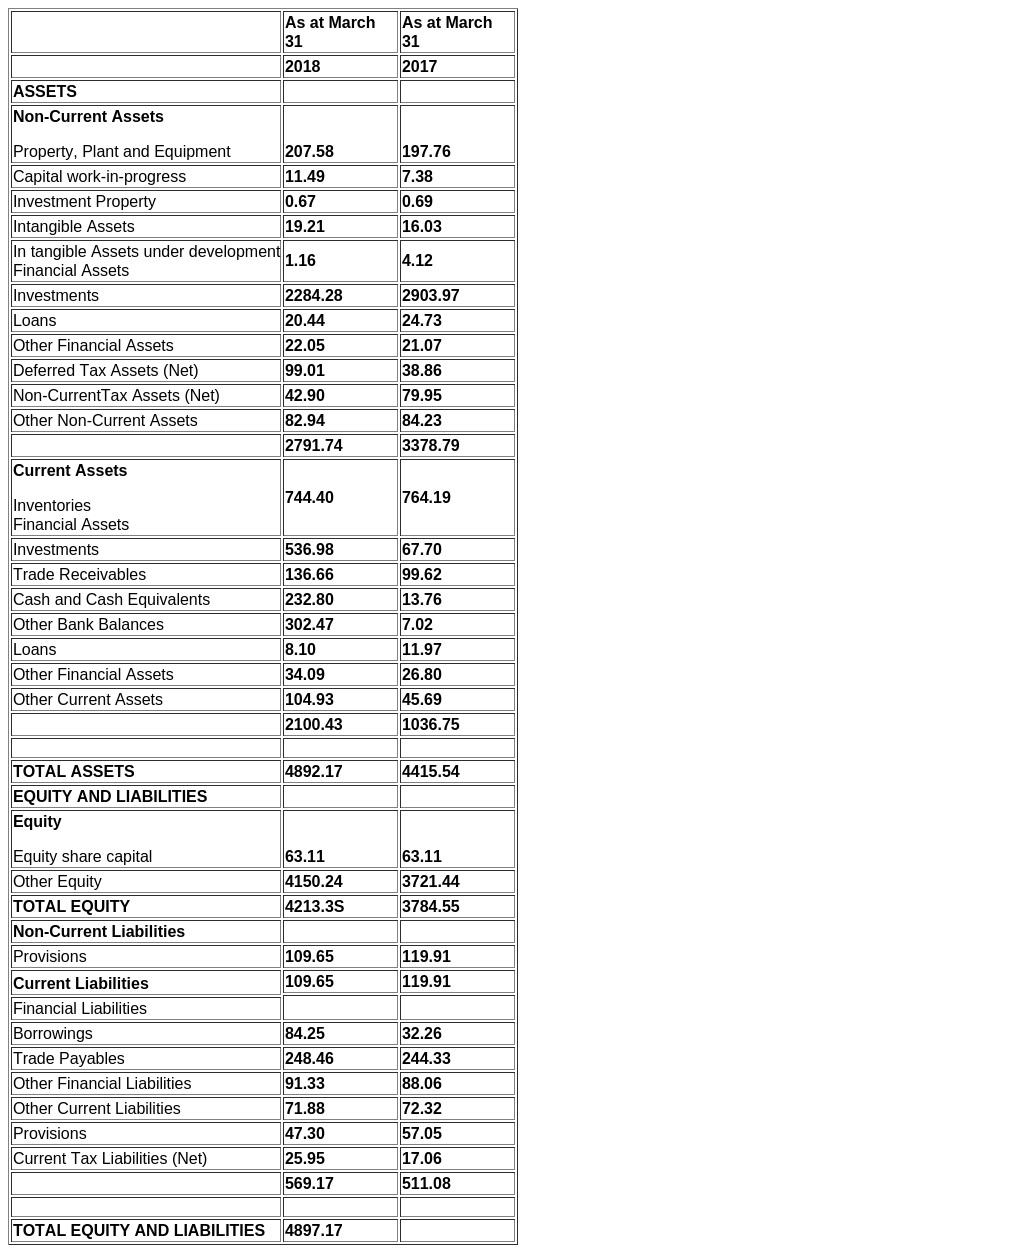

In [ ]:
document_path = list(Path("Docs").glob("*/*"))[0]
images_dir = Path('images')

new_path = convert_html_to_image(document_path, images_dir)
print(f"New Path: {new_path}")

image = Image.open(new_path)
display(image)

In [ ]:
document_paths = list(Path("Docs").glob("*/*"))

for doc_path in tqdm(document_paths):
  convert_html_to_image(doc_path, images_dir, scale = 0.8)

  4%|▍         | 100/2573 [00:39<16:08,  2.55it/s]


KeyboardInterrupt: 

Images directly inside "images":
- image_paths = list(Path("images").glob("*"))

Images in SubDirectories in Images:
- image_paths = list(Path("images").glob("*/**"))

Include files in subdirectories:
- image_paths = list(Path("images").rglob("*"))


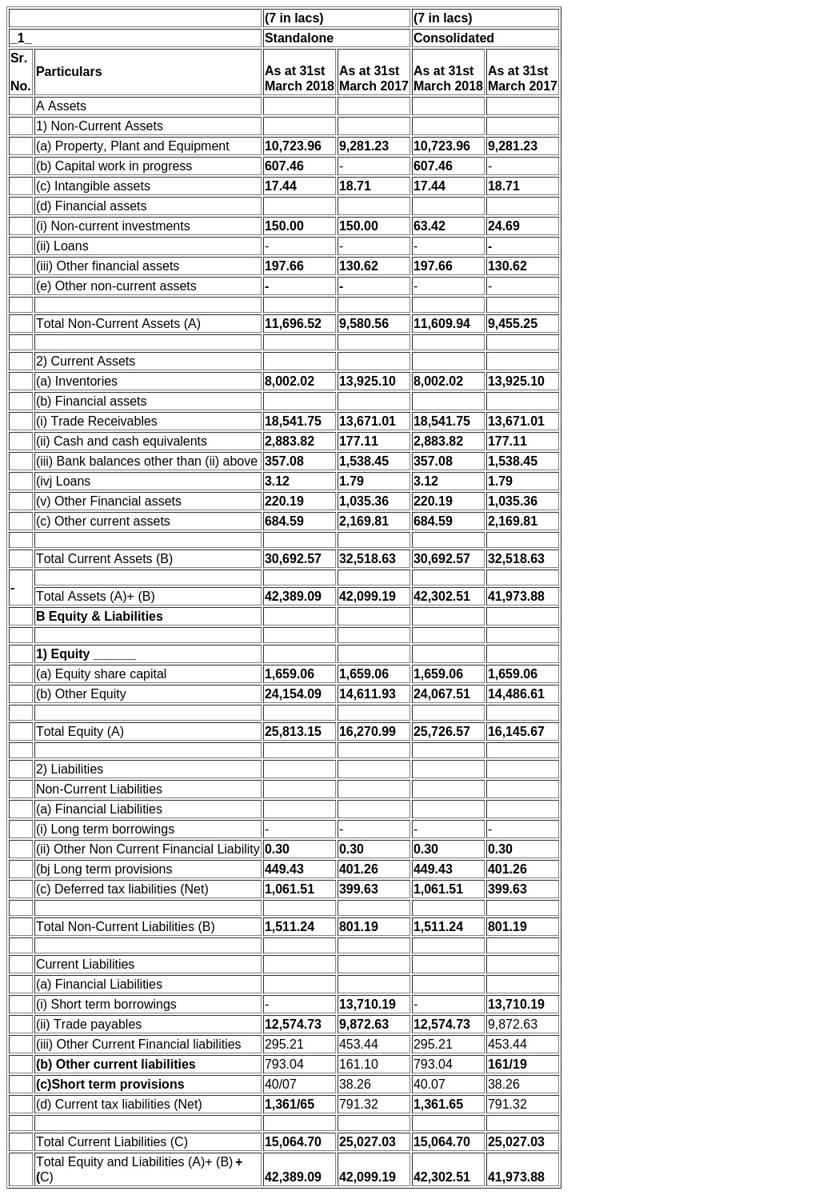

In [ ]:
image_paths = sorted(list(Path("images").glob("*/*")))

image = Image.open(image_paths[0]).convert("RGB")
image

### EasyOCR

1. Find bounding boxes
2. Read, classify characters within bounding boxes

- Detection network -> reader = easyocr.Reader(['en'], detect_network = 'dbnet18')

In [ ]:
reader = easyocr.Reader(["en"])

In [ ]:
%%time
image_path = image_paths[0]
ocr_result = reader.readtext(str(image_path))

CPU times: user 27.9 s, sys: 3.5 s, total: 31.3 s
Wall time: 37.1 s


In [ ]:
ocr_result[0], len(ocr_result)
# Returns positions of the bounding boxes: L,R,T,B

(([[279, 13], [327, 13], [327, 27], [279, 27]],
  'In lacs)',
  0.4307131980323542),
 174)

In [ ]:
def create_bounding_box(bbox_data):
  xs = []
  ys = []

  for x, y in bbox_data:
    xs.append(x)
    ys.append(y)

  left = min(xs)
  top = min(ys)
  right = max(xs)
  bottom = max(ys)

  return [left, top, right, bottom]

In [ ]:
# Get the path where OpenCV's Qt fonts are stored
fonts_path = os.path.join(cv2.__path__[0], 'qt', 'fonts')
print("Fonts path:", fonts_path)

# List the contents of the fonts directory
fonts_list = os.listdir(fonts_path)
print("Fonts available:", fonts_list)

font_path = Path(fonts_path) / "DejaVuSansCondensed.ttf"
font_path.exists()


Fonts path: /usr/local/lib/python3.10/dist-packages/cv2/qt/fonts
Fonts available: ['DejaVuSansCondensed.ttf', 'DejaVuSans-Bold.ttf', 'DejaVuSansCondensed-Oblique.ttf', 'DejaVuSans-Oblique.ttf', 'DejaVuSans-ExtraLight.ttf', 'DejaVuSansCondensed-Bold.ttf', 'DejaVuSans-BoldOblique.ttf', 'DejaVuSansCondensed-BoldOblique.ttf', 'DejaVuSans.ttf']


True

In [ ]:
# Get font
font = ImageFont.truetype(str(font_path), size = 12)

Put the results of the OCR data

Left image - Number or order of words
Right image - Word recognized


In [ ]:
def draw_image(image_path, ocr_result):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28,28))

  left_image = Image.open(image_path).convert("RGB")
  right_image = Image.new("RGB", left_image.size, (255, 255, 255))

  left_draw = ImageDraw.Draw(left_image)
  right_draw = ImageDraw.Draw(right_image)

  # i - index of the word
  for i, (bbox, word, confidence) in enumerate(ocr_result):
    box = create_bounding_box(bbox)

    left_draw.rectangle(box, outline ="blue", width = 2)
    left, top, right, bottom = box

    left_draw.text(
      (right + 5, top),
      text = str(i + 1),
      fill = "red",
      font = font
    )

    right_draw.text(
      (left, top),
      text = word,
      fill = "black",
      font = font
    )

  ax1.imshow(left_image)
  ax2.imshow(right_image)
  ax1.axis("off")
  ax2.axis("off")
  # Adjust layout
  fig.tight_layout(pad=0.5)  # Adjust pad as needed


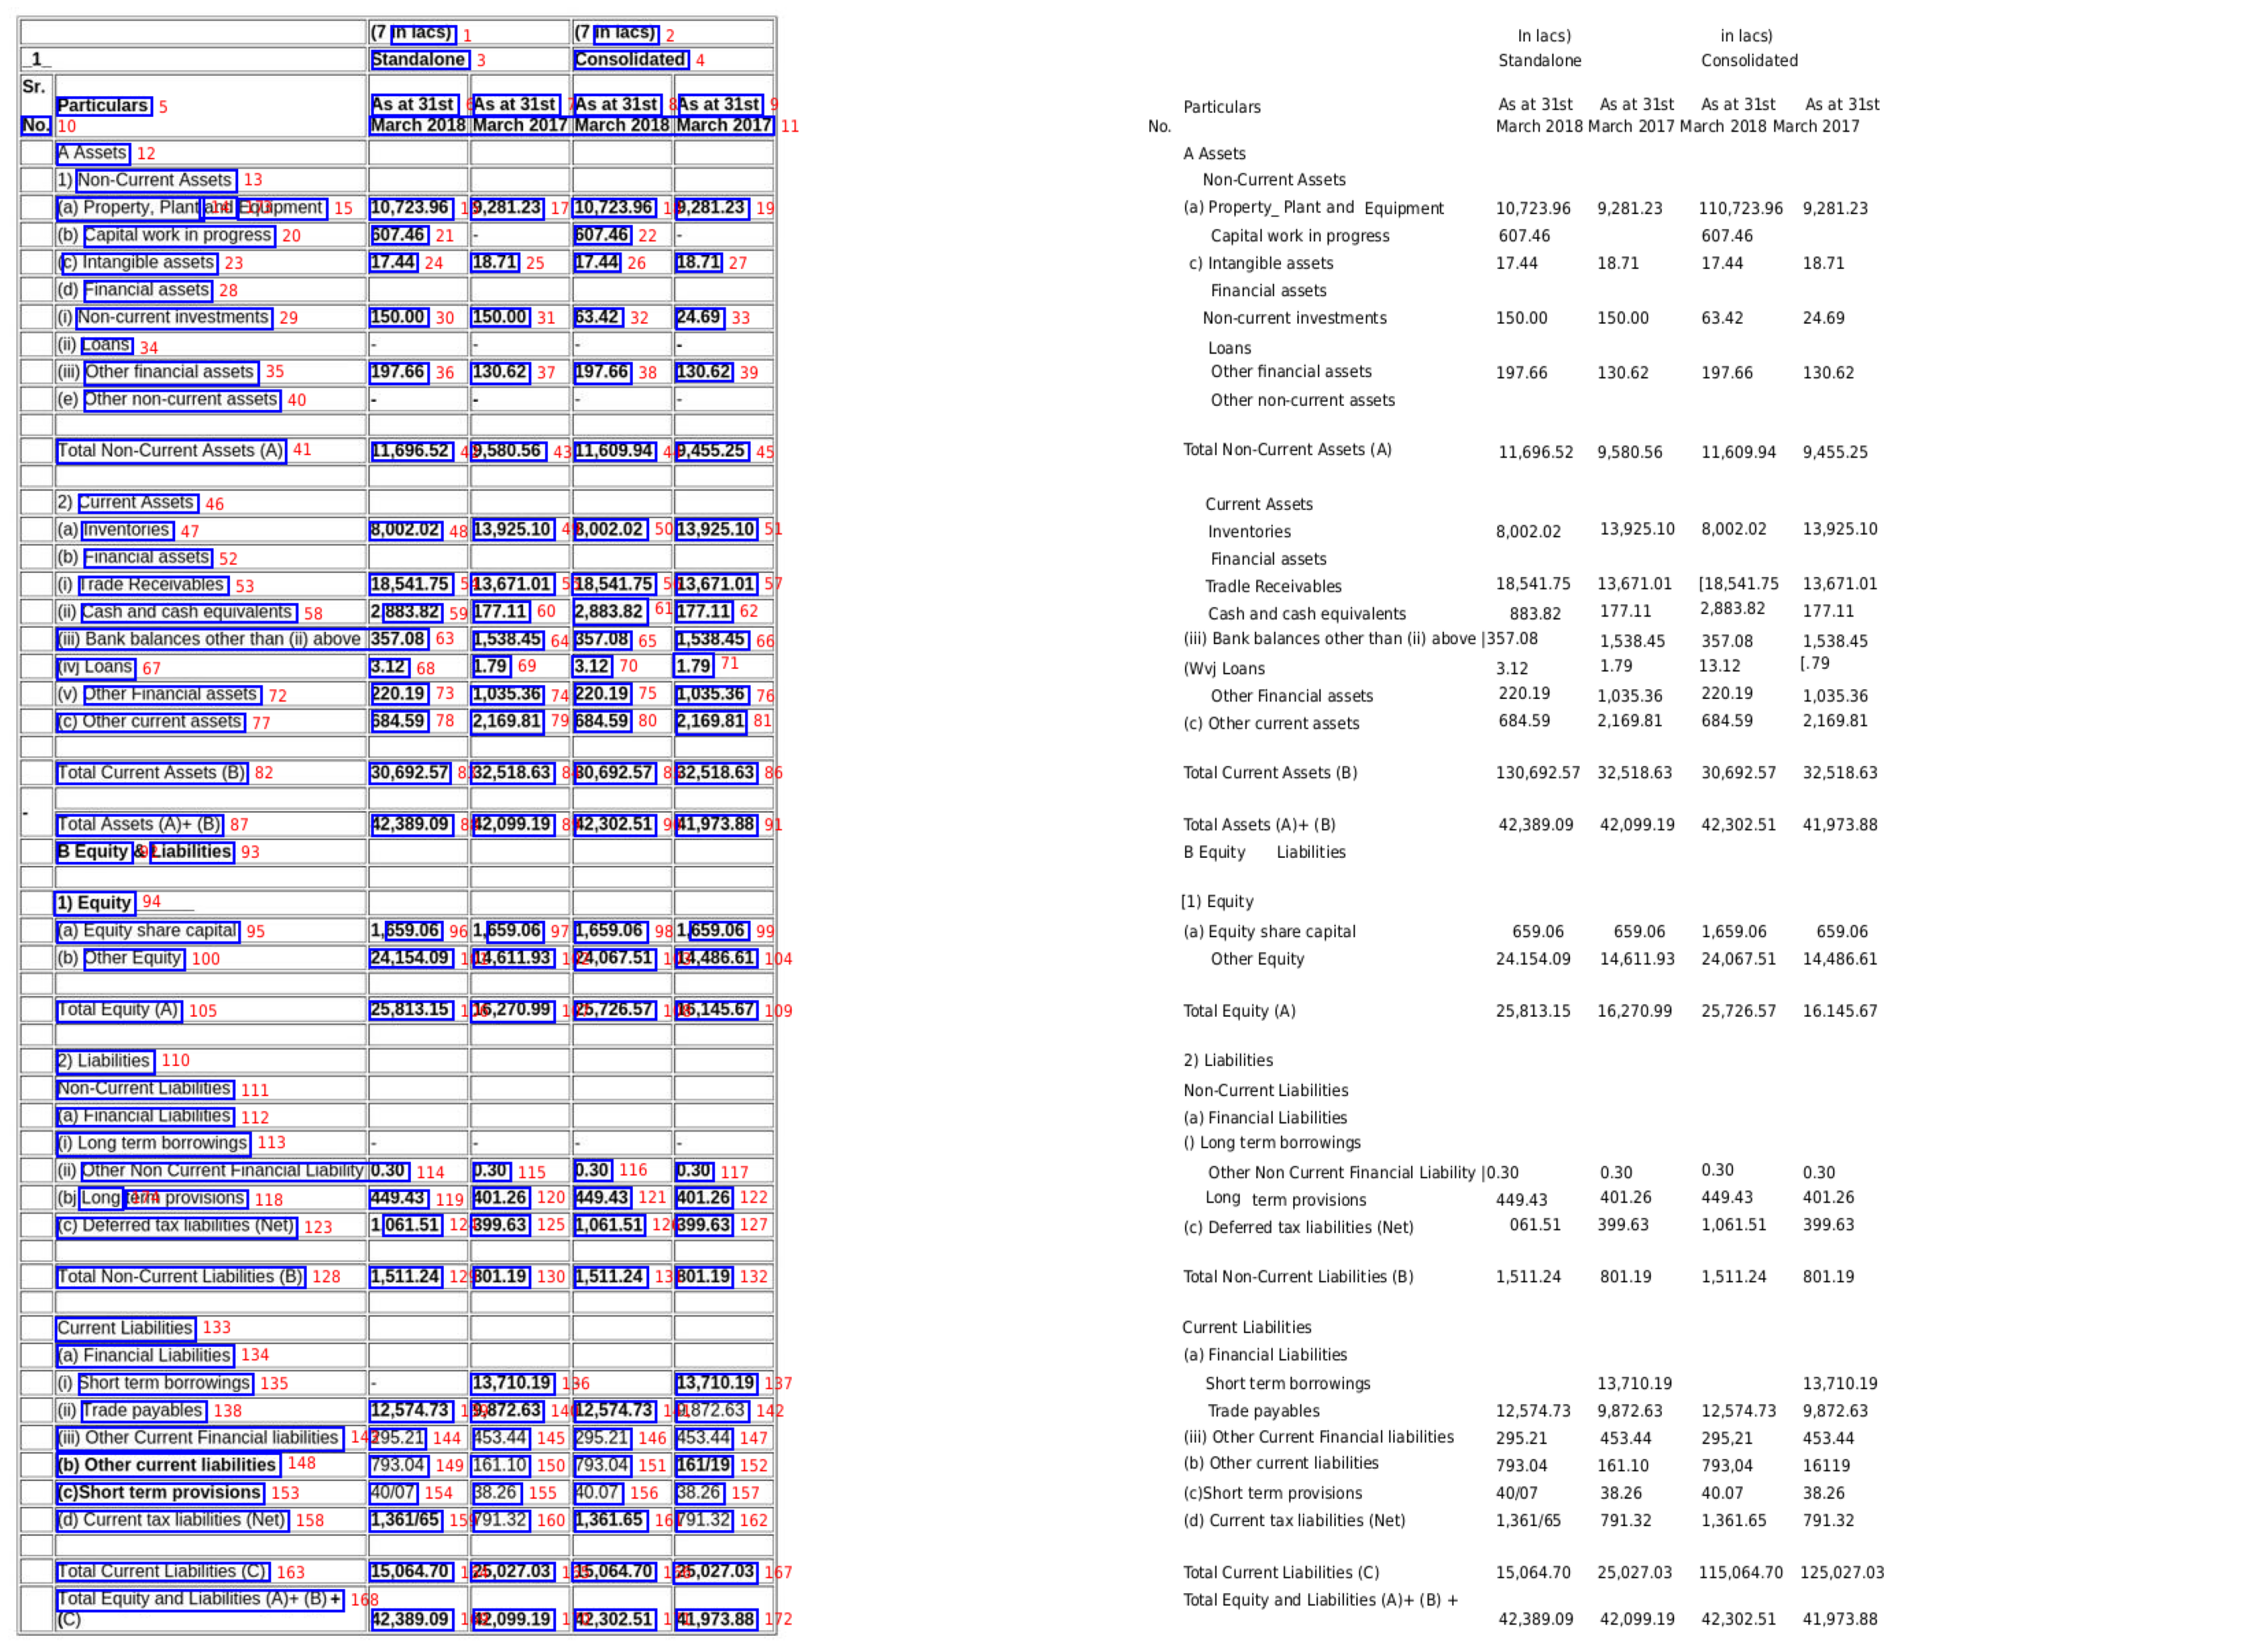

In [ ]:
draw_image(image_path, ocr_result)

In [ ]:
def excel_to_html(excel_path: str, html_path: str):
  df = pd.read_excel(excel_path, sheet_name=None)
  with open(html_path, 'w') as f:
      for sheet_name, data in df.items():
          f.write(f"<h2>{sheet_name}</h2>\n")
          f.write(data.to_html(index=False))

  return html_path

In [ ]:
def csv_to_html(csv_path: str, html_path: str):
  df = pd.read_csv(csv_path)
  with open(html_path, 'w') as f:
      f.write(df.to_html(index=False))

  return html_path

In [ ]:
def pdf_to_html(pdf_path: str, html_path: str):
  with pdfplumber.open(pdf_path) as pdf:
    with open(html_path, 'w') as f:
      for i, page in enumerate(pdf.pages):
        # Extract tables from the page
        tables = page.extract_tables()

        if tables:
          for table in tables:
            df = pd.DataFrame(table[1:], columns=table[0])
            f.write(f"<h2>Page {i + 1} - Table</h2>\n")
            f.write(df.to_html(index=False))

        # Extract text if no tables are found
        text = page.extract_text()
        if text:
          f.write(f"<h2>Page {i + 1} - Text</h2>\n")
          f.write(f"<pre>{text}</pre>")  # Wrap text in <pre> for preserving formatting

  return html_path

In [ ]:
def convert_data_to_html(file_path: str, html_path: str):
  path = Path(file_path)
  ext = path.suffix.lower()
  new_html_Path = None
  if ext in ['.xlsx', '.xls']:
      new_html_path = excel_to_html(file_path, html_path)
  elif ext == '.csv':
      new_html_path = csv_to_html(file_path, html_path)
  elif ext == '.pdf':
      new_html_path = pdf_to_html(file_path, html_path)

  return new_html_path


In [ ]:
def full_process(
    doc_path,
    sample_path
):
  print(f"Doc Path: {doc_path}")

  html_name = doc_path.with_suffix(".html").name
  print(f"Html Name: {html_name}")

  # Convert the file name to lowercase and replace spaces with underscores
  html_name_snake_case = html_name.lower().replace(' ', '_')

  # Construct the new path for the HTML file
  html_path = doc_path.parent / html_name_snake_case

  print(f"Html Path: {html_path}")

  new_html_path = convert_data_to_html(doc_path, html_path)

  file_name = new_html_path.with_suffix(".jpg").name

  new_path = convert_html_to_image(new_html_path, sample_path, scale = 0.8)

  ocr_result_new_path = reader.readtext(str(new_path))

  draw_image(new_path, ocr_result_new_path)


Doc Path: sample_data/Claimed Amount.xlsx
Html Name: Claimed Amount.html
Html Path: sample_data/claimed_amount.html
Html Parent: sample_data || Images Dir: sample_data
Save Path: sample_data/claimed_amount.jpg


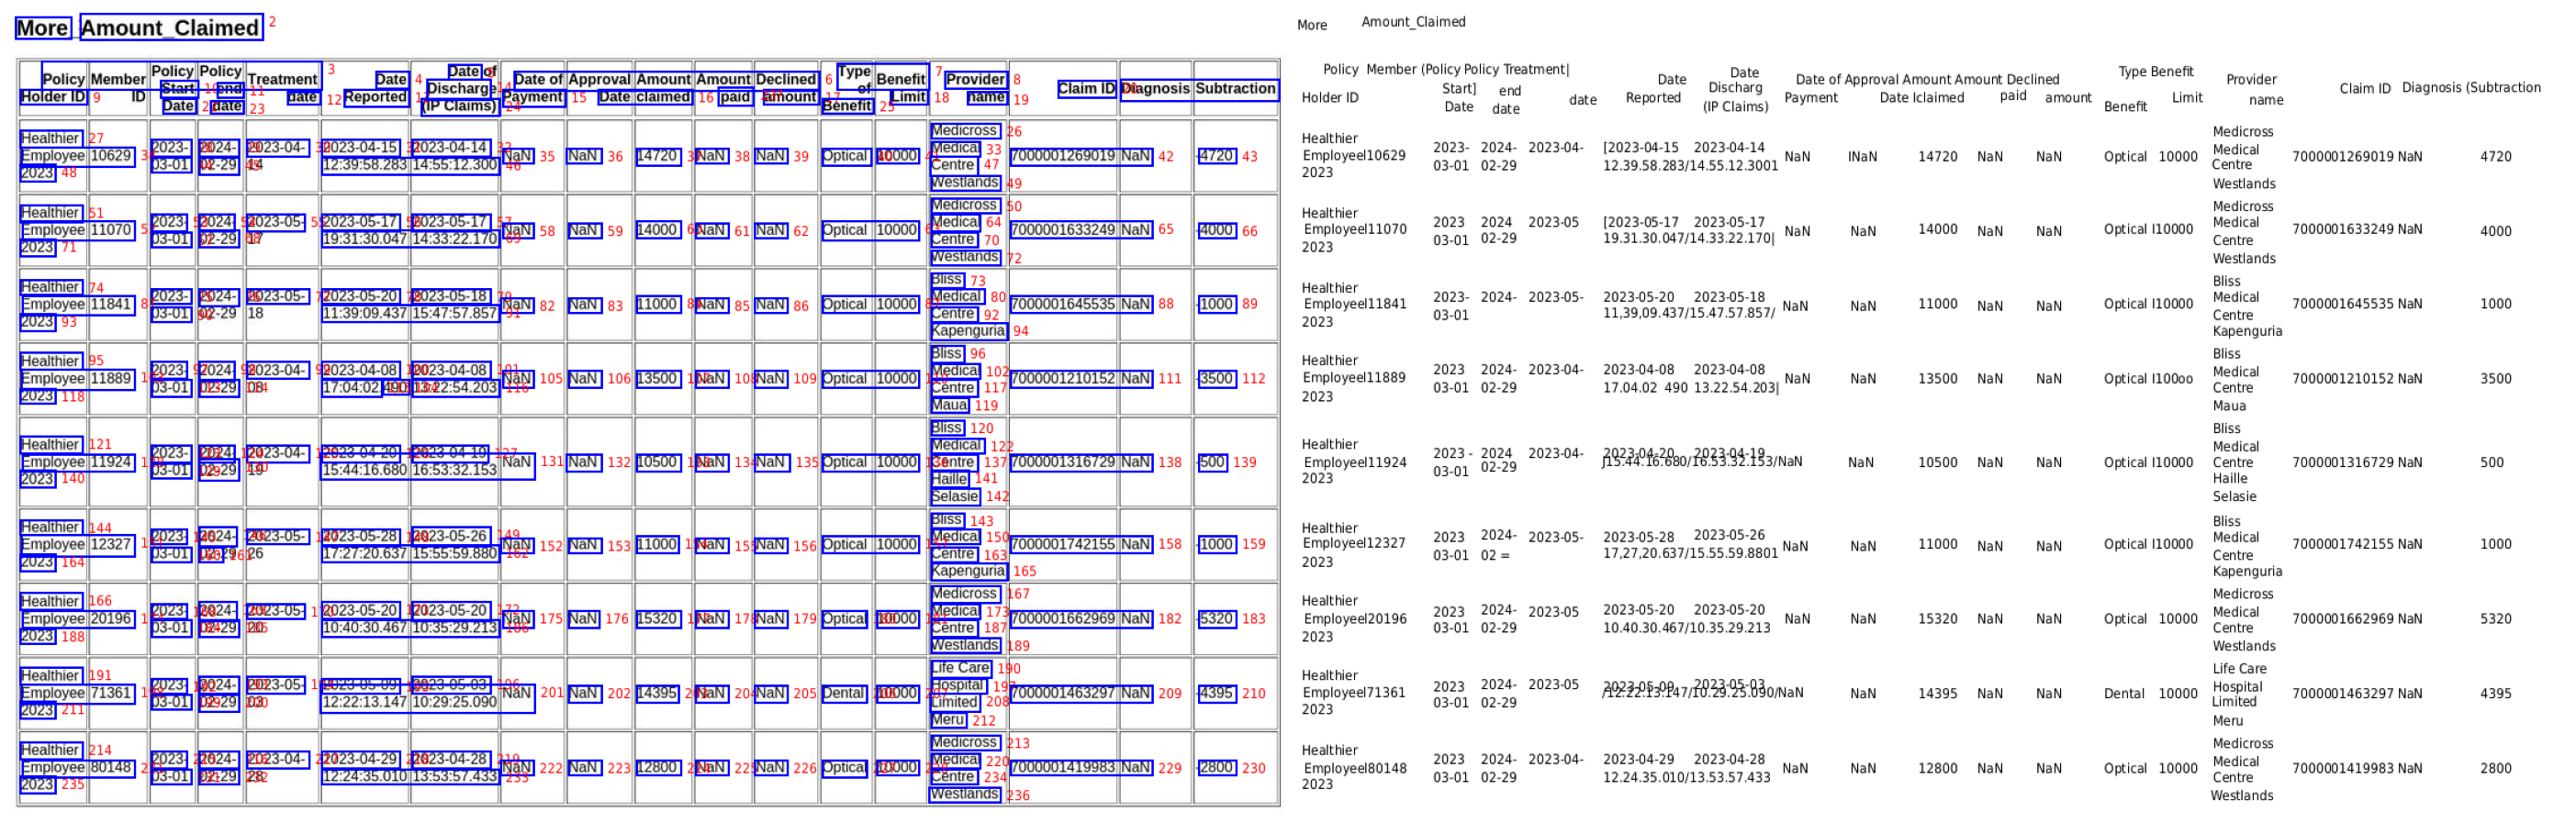

In [ ]:
doc_path = Path("sample_data/Claimed Amount.xlsx")
sample_path = Path("sample_data")

full_process(doc_path, sample_path)